# Package

In [1]:
# PyTorch package and submodules
import torch
import torch.nn as nn
from torch.optim import SGD #gradient descent optimizer

# NumPy for math operations, and Pandas for processing tabular data.
import numpy as np
import pandas as pd

# Plotly plotting package
import plotly.graph_objects as go
import plotly.express as px

# Import matplotlib.pyplot to visualize tree models
import matplotlib.pyplot as plt

# Use imbalanced learn package
from imblearn.over_sampling import SMOTE

from genetic_selection import GeneticSelectionCV

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score


from sklearn.model_selection import StratifiedKFold, train_test_split as tts, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier as XGBC
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [2]:
# Draw matrix fig using seaborn
def matrix_fig(title,y,yp):
  cm = confusion_matrix(y, yp)
  mtfig = sns.heatmap (cm, annot=True, fmt="d",cmap="YlGnBu", xticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'], yticklabels=['0-12 hrs', '12-24 hrs', '>24 hrs'])
  mtfig.set_title(title)
  mtfig.set_ylabel('True label')
  mtfig.set_xlabel('Predicted label')

  
# Evaluation of models
from sklearn.metrics import confusion_matrix
def evaluation(title, y_test, y_pred):
    target_map = {'0-12 hours': 0, '12-24 hrs': 1, '>24 hrs': 2}
    target_names = list(target_map.keys())
    cm = confusion_matrix(y_test, y_pred)
    precision_scores = []
    recall_scores = []
    f1_scores = []
    for i in range(3):
        precision_score = cm[i,i] / sum(cm[:,i])
        recall_score = cm[i,i] / sum(cm[i,:])
        f1_score = 2 * (precision_score * recall_score) / (precision_score + recall_score)
        precision_scores.append(precision_score)
        recall_scores.append(recall_score)
        f1_scores.append(f1_score)
        print(f"Precision_score for class {target_names[i]}: {round(precision_score, 4)}")
        print(f"Recall_score for class {target_names[i]}: {round(recall_score, 4)}")
        print(f"F1_score for class {target_names[i]}: {round(f1_score, 4)}")
    accuracy = sum([cm[i,i] for i in range(3)]) / sum(sum(cm))
    print(f"{title}_Accuracy: {round(accuracy, 4)}")
    
    x = [f"Precision_{target_names[i]}" for i in range(3)] + [f"Recall_{target_names[i]}" for i in range(3)] + [f"F1_{target_names[i]}" for i in range(3)] + ["Accuracy"]
    y = precision_scores + recall_scores + f1_scores + [accuracy]
    fig, ax = plt.subplots()
    #dpi=500
    ax.bar(x, y)
    ax.set_xticklabels(x, rotation=90)
    ax.set_xlabel('Param')
    ax.set_ylabel('Score')
    ax.set_title(title)
    for a,b in zip(x,y):
        plt.text(a,b +0.01, '%.3f' %b, ha='center', va='bottom', fontsize=7)
    plt.show()


def predict_evaluation(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    MCC = matthews_corrcoef(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    fscore = f1_score(y_test, y_pred, average='macro')
    result={'accuracy':accuracy,
            'MCC':MCC,
            'precision':precision,
            'recall':recall,
            'fscore':fscore}
    return result

In [3]:
def roc_auc_fig(title, y_test, y_pred, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test.values, y_pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(8,6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


# Import Data

In [6]:
df = pd.read_csv("/Users/Siqi/Desktop/SPH6004/Group/2Step_1Line.csv")

In [7]:
df.head()

,Unnamed: 0,vent_duration,stay_id,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,...,glucose_24,sodium_24,chloride_24,hemoglobin_24,wbc_24,alt_24,ast_24,alp_24,bilirubin_total_24,pt_24
0,0,25.00,30004144,7.4,0.7,123.5,135.0,102.5,12.40,4.95,...,123.5,135.0,102.5,12.40,4.95,21.5,51.0,40.0,6.65,13.1
1,1,23.00,37418444,6.9,1.1,84.0,121.0,95.0,12.90,9.20,...,71.0,122.0,96.0,12.90,9.20,27.0,90.0,73.0,6.20,31.7
2,2,2.00,36647815,7.3,1.1,99.0,139.0,108.0,9.45,8.80,...,99.0,139.0,108.0,9.45,8.80,39.0,44.0,137.0,4.60,17.4
3,3,11.00,36645475,7.3,2.5,147.0,129.0,90.0,8.70,5.70,...,144.5,127.5,90.5,8.20,6.40,18.0,37.0,66.0,2.20,26.7
4,4,16.35,36645118,7.4,0.8,171.0,138.0,96.0,9.70,9.50,...,171.0,138.0,96.0,9.70,9.50,69.0,25.0,36.0,0.50,12.0


In [8]:
# create a function to label the vent_duration as hours
def label_hours(x):
    if x <= 12:
        return '0-12 hours'
    elif x <= 24:
        return '12-24 hrs'
    else:
        return '>24 hrs'
df['vent_hours'] = df['vent_duration'].apply(label_hours)
df = df.drop(['Unnamed: 0', 'vent_duration','stay_id'], axis=1)

In [9]:
df.head()

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium_24,chloride_24,hemoglobin_24,wbc_24,alt_24,ast_24,alp_24,bilirubin_total_24,pt_24,vent_hours
0,7.4,0.7,123.5,135.0,102.5,12.40,4.95,21.5,51.0,40.0,...,135.0,102.5,12.40,4.95,21.5,51.0,40.0,6.65,13.1,>24 hrs
1,6.9,1.1,84.0,121.0,95.0,12.90,9.20,27.0,90.0,73.0,...,122.0,96.0,12.90,9.20,27.0,90.0,73.0,6.20,31.7,12-24 hrs
2,7.3,1.1,99.0,139.0,108.0,9.45,8.80,39.0,44.0,137.0,...,139.0,108.0,9.45,8.80,39.0,44.0,137.0,4.60,17.4,0-12 hours
3,7.3,2.5,147.0,129.0,90.0,8.70,5.70,18.0,37.0,66.0,...,127.5,90.5,8.20,6.40,18.0,37.0,66.0,2.20,26.7,0-12 hours
4,7.4,0.8,171.0,138.0,96.0,9.70,9.50,69.0,25.0,36.0,...,138.0,96.0,9.70,9.50,69.0,25.0,36.0,0.50,12.0,12-24 hrs


In [9]:
feature_columns = df.columns[~df.columns.isin(['vent_hours'])]
target_column = df['vent_hours']

for i in feature_columns:
  df[i] = pd.to_numeric(df[i])

#df.replace({'outcome': {'False': 0, 'True': 1}})
#df['gender'].replace(to_replace = 'M', value = 1, inplace = True)

df.head()
#df.info()
#df.shape

,calcium_48,creatinine_48,glucose_48,sodium_48,chloride_48,hemoglobin_48,wbc_48,alt_48,ast_48,alp_48,...,sodium+24,chloride+24,hemoglobin+24,wbc+24,alt+24,ast+24,alp+24,bilirubin_total+24,pt+24,vent_hours
0,9.1,0.6,145.0,145.0,103.0,7.6,1.7,19.0,25.0,67.0,...,145.0,104.0,7.15,1.50,21.0,21.0,72.0,0.50,12.20,0-12 hours
1,8.5,2.6,109.0,134.0,94.0,7.1,2.2,34.0,39.0,216.0,...,140.0,104.0,7.90,7.80,168.0,330.5,39.0,3.65,18.85,0-12 hours
2,8.2,1.4,100.0,139.0,111.0,8.5,0.1,13.0,18.0,69.0,...,134.0,106.0,9.00,0.10,13.0,25.0,77.0,1.20,14.30,12-24 hrs
3,9.5,0.7,143.0,131.0,88.0,7.7,9.6,69.0,263.0,178.0,...,148.0,106.0,8.75,12.95,75.0,275.5,171.0,33.20,37.60,12-24 hrs
4,8.7,0.7,107.0,143.0,113.0,8.1,2.8,17.0,20.0,78.0,...,141.0,109.0,9.40,3.70,17.0,20.0,78.0,1.40,12.40,>24 hrs


# Correlation 

In [10]:
# Check correlation
corr = df.corr().abs()
filt_matrix = corr[((corr >= 0.5) | (corr <= -0.5)) & (corr !=1.00)]
plt.figure(figsize=(36,36),dpi = 480)
sns.heatmap(filt_matrix, annot=True, cmap="Reds")
plt.show()

In [11]:
# Select upper triangle of correlation matrix
upper_matrix = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Drop features with correlation greater than 0.75
to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] >= 0.75)]
print(to_drop)
df.drop(to_drop, axis=1, inplace=True)

['ast_48', 'calcium_24', 'creatinine_24', 'glucose_24', 'sodium_24', 'chloride_24', 'hemoglobin_24', 'wbc_24', 'alt_24', 'ast_24', 'alp_24', 'bilirubin_total_24', 'pt_24']


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Feature Selection & TTS

In [26]:
target_map = {'0-12 hrs': 0, '12-24 hrs': 1, '>24 hrs': 2}


X_raw = df.columns[~df.columns.isin(['vent_hours','vent_duration','stay_id'])]
Y_raw = df['vent_hours'].map(target_map)   
data = pd.concat([X_raw.to_frame(), Y_raw.to_frame()], axis=1)

##df['vent_hours'].map(target_map)


# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# Y_raw = le.fit_transform(Y_raw)

# # Check data balance 
# print("0-12 hours:", len(Y_raw[Y_raw=='0-12 hour']))
# print("12-24 hrs:", len(Y_raw[Y_raw == '12-24 hrs']))
# print(">24 hrs:", len(Y_raw[Y_raw == '>24 hrs']))


vent_hours_counts = df['vent_hours'].value_counts()
print(vent_hours_counts)


12-24 hrs     722
>24 hrs       680
0-12 hours    521
Name: vent_hours, dtype: int64


In [29]:
data.head()

,0,vent_hours
0,NaN,2.0
1,NaN,1.0
2,NaN,NaN
3,NaN,NaN
4,NaN,1.0


In [28]:
from sklearn.feature_selection import VarianceThreshold

# Normalize data
scaler = StandardScaler()
data_norm = scaler.fit_transform(data)
df_norm = pd.DataFrame(data_norm)

corr_matrix=df_norm.corr().abs()
upper_triangle=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
to_drop=[column for column in upper_triangle.columns if any(upper_triangle[column]>0.80)]
data_select1=df_norm.drop(to_drop, axis=1)


selector=VarianceThreshold(0)
selector.fit(data_select1)
selected_features=selector.get_support(indices=True)
selected_column_names=data_select1.columns[selected_features].tolist()
data_select2=data_select1[selected_column_names]


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: could not convert string to float: 'alp_48'

In [24]:
selected_columns = df.columns[selected_features].tolist()


In [25]:
selected_columns

['calcium_48',
 'creatinine_48',
 'glucose_48',
 'sodium_48',
 'chloride_48',
 'hemoglobin_48',
 'wbc_48',
 'alt_48',
 'alp_48',
 'bilirubin_total_48',
 'pt_48']

In [23]:
selected_column_names

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [14]:
Xtrain, Xtest, Ytrain, Ytest = tts(df.iloc[:, :-1], Y_raw , test_size=0.2, random_state=1)

In [15]:
Ytrain.value_counts()

2    627
0    505
1    406
Name: vent_hours, dtype: int64

In [16]:
Ytest.value_counts()

2    164
0    119
1    102
Name: vent_hours, dtype: int64

# XGboost

In [17]:
dtrain = xgb.DMatrix(Xtrain, label=Ytrain)
dtest = xgb.DMatrix(Xtest, label=Ytest)

In [18]:
## Baseline
xgb_model = xgb.XGBClassifier(n_estimators=1000, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8)
xgb_model.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [19]:
predy = xgb_model.predict(Xtest)

##predy = xgb.predict(Xtest)

In [20]:
# Calculate accuracy
accuracy = accuracy_score(Ytest, predy)

# Calculate F1 score
f1 = f1_score(Ytest, predy, average='macro')

# Calculate MCC
mcc = matthews_corrcoef(Ytest, predy)

# Calculate precision
precision = precision_score(Ytest, predy, average='macro')

# Calculate recall
recall = recall_score(Ytest, predy, average='macro')

print("Accuracy: {:.3f}".format(accuracy))
print("F1 score: {:.3f}".format(f1))
print("MCC: {:.3f}".format(mcc))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

####If you have a well-balanced dataset, you can use average='macro' instead.

Accuracy: 0.382
F1 score: 0.362
MCC: 0.046
Precision: 0.363
Recall: 0.362


              precision    recall  f1-score   support

           0       0.39      0.37      0.38       119
           1       0.25      0.24      0.24       102
           2       0.44      0.48      0.46       164

    accuracy                           0.38       385
   macro avg       0.36      0.36      0.36       385
weighted avg       0.38      0.38      0.38       385

[[44 23 52]
 [31 24 47]
 [37 48 79]]


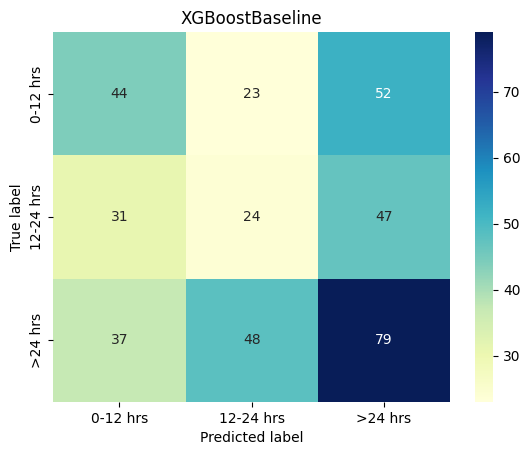

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, predy))
print (metrics.confusion_matrix(Ytest, predy))
matrix_fig('XGBoostBaseline' ,Ytest,predy)

In [22]:
result=predict_evaluation(Ytest, predy)
result

{'accuracy': 0.38181818181818183,
 'MCC': 0.04574197365095547,
 'precision': 0.36310298217453746,
 'recall': 0.3622497779599645,
 'fscore': 0.36219850246032453}

Precision_score for class 0-12 hours: 0.3929
Recall_score for class 0-12 hours: 0.3697
F1_score for class 0-12 hours: 0.381
Precision_score for class 12-24 hrs: 0.2526
Recall_score for class 12-24 hrs: 0.2353
F1_score for class 12-24 hrs: 0.2437
Precision_score for class >24 hrs: 0.4438
Recall_score for class >24 hrs: 0.4817
F1_score for class >24 hrs: 0.462
XGBoost_BaseLine_Accuracy: 0.3818


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


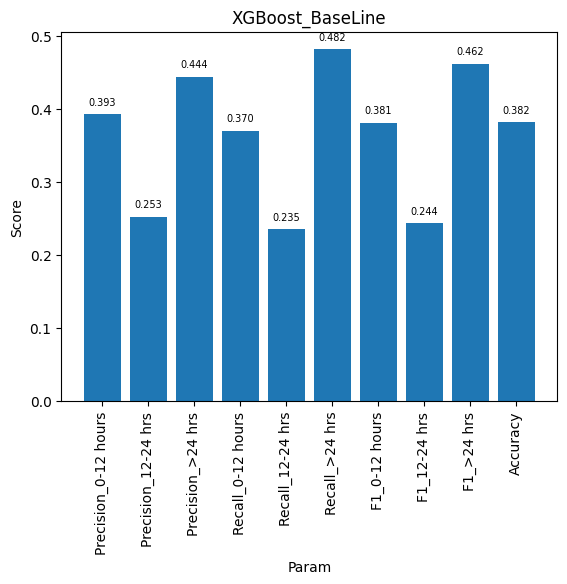

In [24]:
evaluation("XGBoost_BaseLine", Ytest, predy)

In [26]:
# define the parameter grid
param_grid = {
    'n_estimators':np.arange(start=2,stop=310,step=50),
    'max_depth': [3, 4, 5, 7],
    'learning_rate':np.arange(start=0.01,stop=0.4,step=0.05),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# create the XGBClassifier object
xgb = XGBC(objective='multi:softmax')

# create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

# fit the GridSearchCV object to the data
grid_search.fit(Xtrain, Ytrain)

# print the best parameters
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 52, 'subsample': 0.6}


In [33]:

xgb_model2 = XGBC(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 3, n_estimators= 50, subsample = 0.6)
xgb_model2.fit(Xtrain, Ytrain)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [34]:
y_pred = xgb_model2.predict(Xtest)

##predy = xgb.predict(Xtest)

              precision    recall  f1-score   support

           0       0.39      0.33      0.35       119
           1       0.50      0.03      0.06       102
           2       0.44      0.75      0.56       164

    accuracy                           0.43       385
   macro avg       0.44      0.37      0.32       385
weighted avg       0.44      0.43      0.36       385

[[ 39   0  80]
 [ 24   3  75]
 [ 38   3 123]]


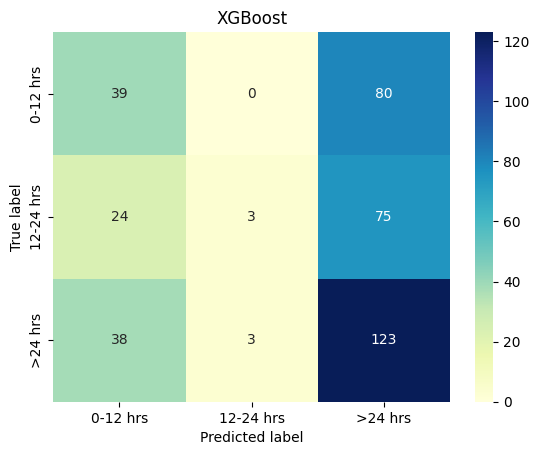

In [35]:

print(classification_report(Ytest, y_pred))
print (metrics.confusion_matrix(Ytest, y_pred))
matrix_fig('XGBoost' ,Ytest,y_pred)

In [36]:
result=predict_evaluation(Ytest, y_pred)
result

{'accuracy': 0.42857142857142855,
 'MCC': 0.06917898128507831,
 'precision': 0.4428615523422846,
 'recall': 0.36904761904761907,
 'fscore': 0.32222069869128694}

Precision_score for class 0-12 hours: 0.3861
Recall_score for class 0-12 hours: 0.3277
F1_score for class 0-12 hours: 0.3545
Precision_score for class 12-24 hrs: 0.5
Recall_score for class 12-24 hrs: 0.0294
F1_score for class 12-24 hrs: 0.0556
Precision_score for class >24 hrs: 0.4424
Recall_score for class >24 hrs: 0.75
F1_score for class >24 hrs: 0.5566
XGBoost_Accuracy: 0.4286


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


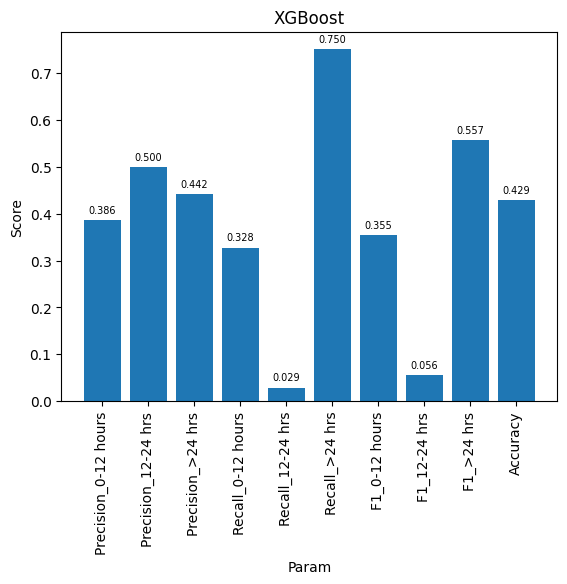

In [37]:
evaluation("XGBoost", Ytest, y_pred)

In [2]:
parameters = {
    'n_estimators':np.arange(start=2,stop=20,step=4),
    'max_depth':np.arange(start=2,stop=5,step=1),
    'learning_rate':np.arange(start=0.01,stop=0.3,step=0.05),
    #'gamma':np.arange(start=0,stop=0.4,step=0.05),
    'min_child_weight':np.arange(start=1,stop=3,step=1),
    'reg_alpha':np.arange(start=0.1,stop=3,step=1)
}
stratifiedCV = StratifiedKFold(n_splits=5)
# XGBC: XGBoost classifier
XGBoostModel = XGBC(objective='multi:softmax')
BestXGBoost = GridSearchCV(
    XGBoostModel,
    param_grid=parameters,
    scoring='f1_macro',
    cv=stratifiedCV,
    verbose=1,
    n_jobs=-1 # use all cpu cores to speedup grid search
)
BestXGBoost.fit(Xtrain,Ytrain)


NameError: name 'np' is not defined

In [41]:
print(BestXGBoost.best_params_)

{'learning_rate': 0.11, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 2, 'reg_alpha': 1.1}


In [42]:
xxx = XGBC(max_depth=2, learning_rate=0.01, n_estimators=2,
                        min_child_weight=1, reg_alpha=2.1)
xxx.fit(Xtrain, Ytrain)
pred = xxx.predict(Xtest)
result=predict_evaluation(Ytest, pred)
result


{'accuracy': 0.4155844155844156,
 'MCC': 0.08630720598172686,
 'precision': 0.4047313215441313,
 'recall': 0.3909783425565348,
 'fscore': 0.3897775042304589}

              precision    recall  f1-score   support

           0       0.36      0.39      0.38       119
           1       0.39      0.24      0.29       102
           2       0.46      0.54      0.50       164

    accuracy                           0.42       385
   macro avg       0.40      0.39      0.39       385
weighted avg       0.41      0.42      0.41       385

[[47 17 55]
 [27 24 51]
 [55 20 89]]
Precision_score for class 0-12 hours: 0.3643
Recall_score for class 0-12 hours: 0.395
F1_score for class 0-12 hours: 0.379
Precision_score for class 12-24 hrs: 0.3934
Recall_score for class 12-24 hrs: 0.2353
F1_score for class 12-24 hrs: 0.2945
Precision_score for class >24 hrs: 0.4564
Recall_score for class >24 hrs: 0.5427
F1_score for class >24 hrs: 0.4958
XGBoost_Accuracy: 0.4156


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


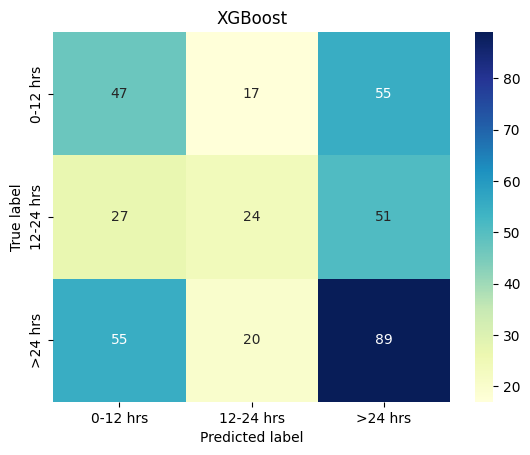

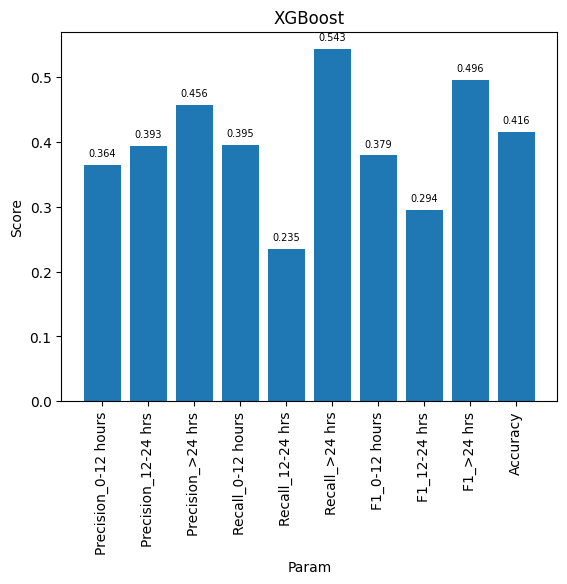

In [43]:

print(classification_report(Ytest, pred))
print (metrics.confusion_matrix(Ytest, pred))
matrix_fig('XGBoost' ,Ytest,pred)
evaluation("XGBoost", Ytest, pred)

# Lightgbm

In [44]:
import lightgbm as lgb

In [45]:

model = lgb.LGBMClassifier(objective='multiclass', 
                             n_estimators=1000, 
                             max_depth=4, 
                             learning_rate=0.1, 
                             reg_lambda=1)
model.fit(Xtrain, Ytrain, verbose=False)

: 

: 

In [ ]:
y1 = model.predict(Xtest)

##predy = xgb.predict(Xtest)

In [1]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y1))
print (metrics.confusion_matrix(Ytest, y1))
matrix_fig('Lightgbm_BaseLine' ,Ytest,y1)
evaluation("Lightgbm_BaseLine", Ytest, y1)

NameError: name 'Ytest' is not defined

In [27]:
result=predict_evaluation(Ytest, y1)
result

{'accuracy': 0.4701298701298701,
 'MCC': 0.19688048580919532,
 'precision': 0.4564390051322542,
 'recall': 0.4564342389159908,
 'fscore': 0.45630834992679303}

In [21]:
from lightgbm import LGBMClassifier

In [22]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5, 10],
    'learning_rate': [0.5, 0.1, 0.01, 0.001]
}

# create the LGBMClassifier object
lgbm = LGBMClassifier(objective='multiclass')

# create the GridSearchCV object
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5,verbose=3)

# fit the GridSearchCV object to the data
grid_search.fit(Xtrain, Ytrain)

# Print best parameters and corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.464 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.474 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.455 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.485 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=10;, score=0.498 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.464 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.474 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100, num_leaves=20;, score=0.455 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators

In [23]:
# Create a new LightGBM classifier with the best parameters
best_lgb_model = lgb.LGBMClassifier(learning_rate=grid_search.best_params_['learning_rate'],
                                    num_leaves=grid_search.best_params_['num_leaves'],
                                    max_depth=grid_search.best_params_['max_depth'],
                                    n_estimators=grid_search.best_params_['n_estimators'])

best_lgb_model.fit(Xtrain, Ytrain)

LGBMClassifier(learning_rate=0.01, max_depth=3, num_leaves=10)

In [24]:
y3 = best_lgb_model.predict(Xtest)

              precision    recall  f1-score   support

           0       0.46      0.15      0.23       105
           1       0.91      0.53      0.67       137
           2       0.47      0.90      0.62       143

    accuracy                           0.56       385
   macro avg       0.61      0.52      0.50       385
weighted avg       0.62      0.56      0.53       385

[[ 16   5  84]
 [  6  72  59]
 [ 13   2 128]]
Precision_score for class 0-12 hours: 0.4571
Recall_score for class 0-12 hours: 0.1524
F1_score for class 0-12 hours: 0.2286
Precision_score for class 12-24 hrs: 0.9114
Recall_score for class 12-24 hrs: 0.5255
F1_score for class 12-24 hrs: 0.6667
Precision_score for class >24 hrs: 0.4723
Recall_score for class >24 hrs: 0.8951
F1_score for class >24 hrs: 0.6184
Lightgbm_Accuracy: 0.561


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


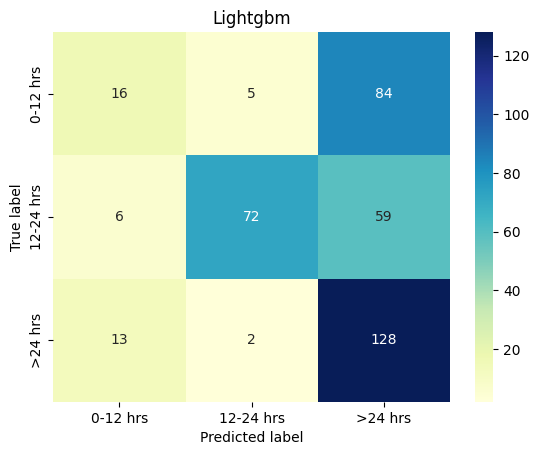

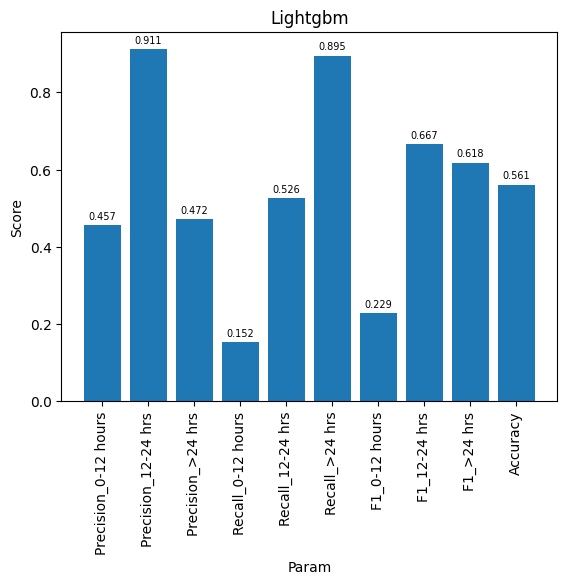

{'accuracy': 0.561038961038961,
 'MCC': 0.3682672852904708,
 'precision': 0.6136199951511269,
 'recall': 0.524344430913774,
 'fscore': 0.5045318610536002}

In [28]:
print(classification_report(Ytest, y3))
print (metrics.confusion_matrix(Ytest, y3))
matrix_fig('Lightgbm' ,Ytest,y3)
evaluation("Lightgbm", Ytest, y3)
result=predict_evaluation(Ytest, y3)
result

# RandomForest

In [30]:
rf_model = RandomForestClassifier()

# Set up parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
}

# Perform grid search using 5-fold cross validation
rf_grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5, verbose=3, n_jobs=-1)
rf_grid_search.fit(Xtrain, Ytrain)

print("Best parameters:", rf_grid_search.best_params_)
print("Best score:", rf_grid_search.best_score_)


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.481 total time=   0.1s
[CV 4/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.528 total time=   0.1s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.532 total time=   0.1s
[CV 1/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.494 total time=   0.1s
[CV 5/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.518 total time=   0.1s
[CV 3/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.497 total time=   0.2s
[CV 2/5] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.526 total t

In [34]:
best_rf_model = RandomForestClassifier(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                        max_features=rf_grid_search.best_params_['max_features'],
                                        max_depth=rf_grid_search.best_params_['max_depth'],
                                        min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                        min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'])

# Train the model on the entire dataset
best_rf_model.fit(Xtrain, Ytrain)


RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=8, n_estimators=150)

              precision    recall  f1-score   support

           0       0.47      0.29      0.36       105
           1       0.99      0.53      0.69       137
           2       0.47      0.81      0.59       143

    accuracy                           0.57       385
   macro avg       0.64      0.54      0.54       385
weighted avg       0.65      0.57      0.56       385

[[ 30   0  75]
 [  8  72  57]
 [ 26   1 116]]
Precision_score for class 0-12 hours: 0.4688
Recall_score for class 0-12 hours: 0.2857
F1_score for class 0-12 hours: 0.355
Precision_score for class 12-24 hrs: 0.9863
Recall_score for class 12-24 hrs: 0.5255
F1_score for class 12-24 hrs: 0.6857
Precision_score for class >24 hrs: 0.4677
Recall_score for class >24 hrs: 0.8112
F1_score for class >24 hrs: 0.5934
Lightgbm_Accuracy: 0.5662


/Users/Siqi/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator


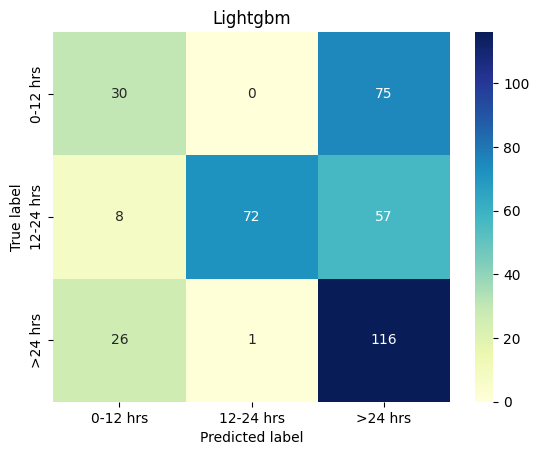

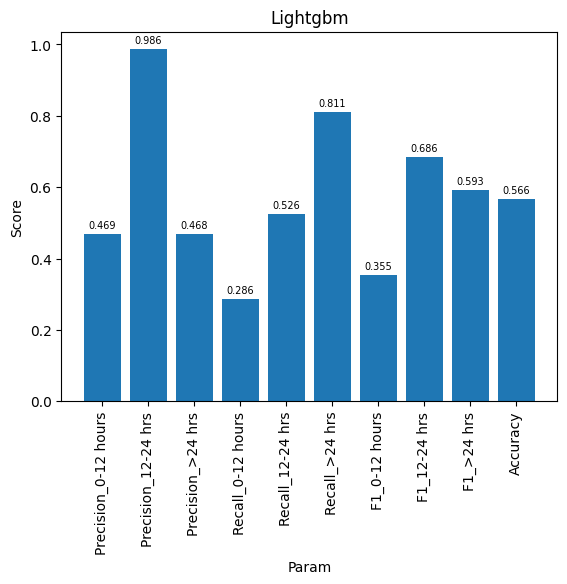

{'accuracy': 0.5662337662337662,
 'MCC': 0.36477382848424095,
 'precision': 0.6409311017822948,
 'recall': 0.5408168473861904,
 'fscore': 0.544698085048272}

In [35]:
y4 = best_rf_model.predict(Xtest)
print(classification_report(Ytest, y4))
print (metrics.confusion_matrix(Ytest, y4))
matrix_fig('Lightgbm' ,Ytest,y4)
evaluation("Lightgbm", Ytest, y4)
result=predict_evaluation(Ytest, y4)
result